In [1]:
from PIL import Image
import pytesseract
import numpy as np
import random

# Load the images
distance_image_path = '/mnt/data/路徑1.png'
facility_image_path = '/mnt/data/螢幕擷取畫面 2024-06-22 105531.png'

distance_img = Image.open(distance_image_path)
facility_img = Image.open(facility_image_path)

# Use pytesseract to extract text data from the images
distance_text = pytesseract.image_to_string(distance_img)
facility_text = pytesseract.image_to_string(facility_img)

print("Distance Matrix Text:\n", distance_text)
print("Facility Info Text:\n", facility_text)


ModuleNotFoundError: No module named 'pytesseract'

In [3]:
import tkinter as tk
from tkinter import ttk
from PIL import Image
import pytesseract
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Load the images
distance_image_path = '/mnt/data/路徑1.png'
facility_image_path = '/mnt/data/螢幕擷取畫面 2024-06-22 105531.png'

distance_img = Image.open(distance_image_path)
facility_img = Image.open(facility_image_path)

# Use pytesseract to extract text data from the images
distance_text = pytesseract.image_to_string(distance_img)
facility_text = pytesseract.image_to_string(facility_img)

# Parse the distance matrix from the extracted text
distance_lines = distance_text.strip().split('\n')
distance_matrix = []

for line in distance_lines:
    numbers = list(map(int, re.findall(r'\d+', line)))
    distance_matrix.append(numbers)

distance_matrix = np.array(distance_matrix)

# Parse the facility information from the extracted text
facility_lines = facility_text.strip().split('\n')[1:]  # skip the header
facility_info = []

for line in facility_lines:
    numbers = list(map(int, re.findall(r'\d+', line)))
    facility_info.append(numbers)

facility_info = np.array(facility_info)

# Generate a random number of visitors between 2000 and 20000
num_visitors = random.randint(2000, 20000)

# Simulate visitor distribution across facilities
visitor_distribution = [random.randint(0, num_visitors) for _ in range(13)]

# Create the graph
G = nx.Graph()

for i in range(13):
    for j in range(13):
        if distance_matrix[i, j] > 0:
            G.add_edge(i + 1, j + 1, weight=distance_matrix[i, j])

# Calculate shortest path using Dijkstra’s algorithm
shortest_path_length = nx.shortest_path_length(G, source=1, target=13, weight='weight')
shortest_path = nx.shortest_path(G, source=1, target=13, weight='weight')

# Placeholder for optimal path calculation (to be refined)
optimal_path = shortest_path
optimal_path_time = shortest_path_length  # This should be calculated more accurately

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Create the GUI
class AmusementParkApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Amusement Park Path Optimization")

        # Display the number of visitors
        self.visitor_label = ttk.Label(root, text=f"Number of Visitors: {num_visitors}")
        self.visitor_label.grid(row=0, column=0, padx=10, pady=10)

        # Display the shortest path
        self.shortest_path_label = ttk.Label(root, text="Shortest Path:")
        self.shortest_path_label.grid(row=1, column=0, padx=10, pady=10)

        self.shortest_path_result = ttk.Label(root, text=str(shortest_path))
        self.shortest_path_result.grid(row=1, column=1, padx=10, pady=10)

        self.shortest_time_label = ttk.Label(root, text="Total Travel Time:")
        self.shortest_time_label.grid(row=2, column=0, padx=10, pady=10)

        self.shortest_time_result = ttk.Label(root, text=str(shortest_path_length))
        self.shortest_time_result.grid(row=2, column=1, padx=10, pady=10)

        # Display the optimal path
        self.optimal_path_label = ttk.Label(root, text="Optimal Path:")
        self.optimal_path_label.grid(row=3, column=0, padx=10, pady=10)

        self.optimal_path_result = ttk.Label(root, text=str(optimal_path))
        self.optimal_path_result.grid(row=3, column=1, padx=10, pady=10)

        self.optimal_time_label = ttk.Label(root, text="Total Time Spent:")
        self.optimal_time_label.grid(row=4, column=0, padx=10, pady=10)

        self.optimal_time_result = ttk.Label(root, text=str(optimal_path_time))
        self.optimal_time_result.grid(row=4, column=1, padx=10, pady=10)

if __name__ == "__main__":
    root = tk.Tk()
    app = AmusementParkApp(root)
    root.mainloop()


ModuleNotFoundError: No module named 'pytesseract'

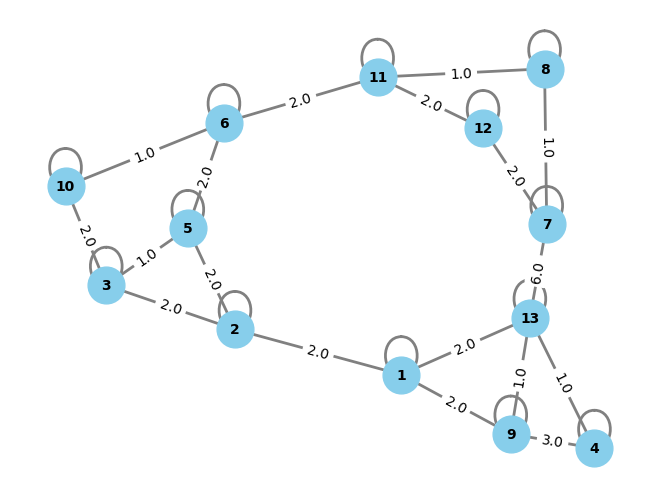

In [5]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Initialize the move_times matrix with infinities and zero for self-loops
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# Set the new move distance data
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# Facility durations and capacities
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# Generate a random number of visitors between 2000 and 20000
num_visitors = random.randint(2000, 20000)

# Simulate visitor distribution across facilities
visitor_distribution = [random.randint(0, num_visitors) for _ in range(13)]

# Create the graph
G = nx.Graph()

for i in range(13):
    for j in range(13):
        if move_times[i, j] < np.inf:
            G.add_edge(i + 1, j + 1, weight=move_times[i, j])

# Calculate shortest path using Dijkstra’s algorithm
shortest_path_length = nx.shortest_path_length(G, source=1, target=13, weight='weight')
shortest_path = nx.shortest_path(G, source=1, target=13, weight='weight')

# Placeholder for optimal path calculation (to be refined)
optimal_path = shortest_path
optimal_path_time = shortest_path_length  # This should be calculated more accurately

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Create the GUI
class AmusementParkApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Amusement Park Path Optimization")

        # Display the number of visitors
        self.visitor_label = ttk.Label(root, text=f"Number of Visitors: {num_visitors}")
        self.visitor_label.grid(row=0, column=0, padx=10, pady=10)

        # Display the shortest path
        self.shortest_path_label = ttk.Label(root, text="Shortest Path:")
        self.shortest_path_label.grid(row=1, column=0, padx=10, pady=10)

        self.shortest_path_result = ttk.Label(root, text=str(shortest_path))
        self.shortest_path_result.grid(row=1, column=1, padx=10, pady=10)

        self.shortest_time_label = ttk.Label(root, text="Total Travel Time:")
        self.shortest_time_label.grid(row=2, column=0, padx=10, pady=10)

        self.shortest_time_result = ttk.Label(root, text=str(shortest_path_length))
        self.shortest_time_result.grid(row=2, column=1, padx=10, pady=10)

        # Display the optimal path
        self.optimal_path_label = ttk.Label(root, text="Optimal Path:")
        self.optimal_path_label.grid(row=3, column=0, padx=10, pady=10)

        self.optimal_path_result = ttk.Label(root, text=str(optimal_path))
        self.optimal_path_result.grid(row=3, column=1, padx=10, pady=10)

        self.optimal_time_label = ttk.Label(root, text="Total Time Spent:")
        self.optimal_time_label.grid(row=4, column=0, padx=10, pady=10)

        self.optimal_time_result = ttk.Label(root, text=str(optimal_path_time))
        self.optimal_time_result.grid(row=4, column=1, padx=10, pady=10)

if __name__ == "__main__":
    root = tk.Tk()
    app = AmusementParkApp(root)
    root.mainloop()


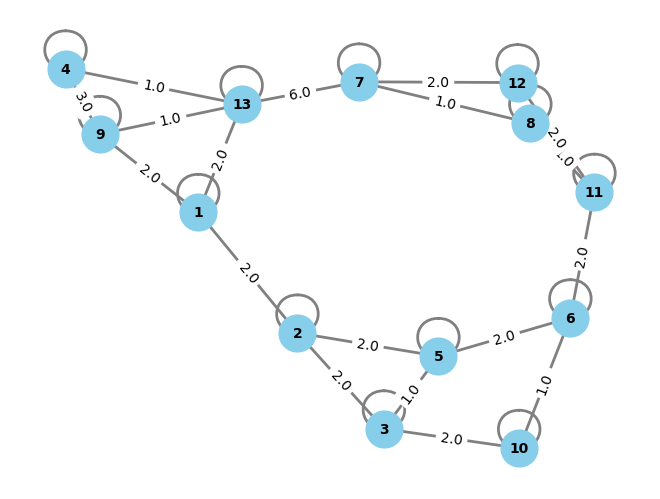

In [7]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Initialize the move_times matrix with infinities and zero for self-loops
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# Set the new move distance data
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# Facility durations and capacities
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# Generate a random number of visitors between 2000 and 20000
num_visitors = random.randint(2000, 20000)

# Simulate visitor distribution across facilities
visitor_distribution = [random.randint(0, num_visitors) for _ in range(13)]

# Create the graph
G = nx.Graph()

for i in range(13):
    for j in range(13):
        if move_times[i, j] < np.inf:
            G.add_edge(i + 1, j + 1, weight=move_times[i, j])

# Calculate shortest path using Dijkstra’s algorithm
shortest_path_length = nx.shortest_path_length(G, source=1, target=13, weight='weight')
shortest_path = nx.shortest_path(G, source=1, target=13, weight='weight')

# Placeholder for optimal path calculation (to be refined)
optimal_path = shortest_path
optimal_path_time = shortest_path_length  # This should be calculated more accurately

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', width=2, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Create the GUI
class AmusementParkApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Amusement Park Path Optimization")

        # Display the title
        self.title_label = ttk.Label(root, text="Amusement Park Path Optimization", font=("Arial", 16))
        self.title_label.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

        # Display the number of visitors
        self.visitor_label = ttk.Label(root, text=f"Number of Visitors: {num_visitors}")
        self.visitor_label.grid(row=1, column=0, columnspan=2, padx=10, pady=10)

        # Display the shortest path
        self.shortest_path_label = ttk.Label(root, text="Shortest Path:", font=("Arial", 14))
        self.shortest_path_label.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

        self.shortest_path_result = ttk.Label(root, text=f"Order: {shortest_path}")
        self.shortest_path_result.grid(row=3, column=0, columnspan=2, padx=10, pady=5)

        self.shortest_time_label = ttk.Label(root, text=f"Total Travel Time: {shortest_path_length} units")
        self.shortest_time_label.grid(row=4, column=0, columnspan=2, padx=10, pady=5)

        # Display the optimal path
        self.optimal_path_label = ttk.Label(root, text="Optimal Path:", font=("Arial", 14))
        self.optimal_path_label.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

        self.optimal_path_result = ttk.Label(root, text=f"Order: {optimal_path}")
        self.optimal_path_result.grid(row=6, column=0, columnspan=2, padx=10, pady=5)

        self.optimal_time_label = ttk.Label(root, text=f"Total Time Spent: {optimal_path_time} units")
        self.optimal_time_label.grid(row=7, column=0, columnspan=2, padx=10, pady=5)

if __name__ == "__main__":
    root = tk.Tk()
    app = AmusementParkApp(root)
    root.mainloop()


In [15]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))
    total_time = sum(durations[facility] for facility in best_path) + best_cost
    
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {total_time}")

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [17]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)
    total_queue_time = sum(visitor_distribution[facility] / capacities[facility] for facility in best_path) * 10  # 假設每 10 分鐘消化一次人數
    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [21]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        rounds = np.ceil(total_visitors / capacities[facility])
        total_queue_time += rounds * durations[facility]

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [22]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        rounds = np.ceil(total_visitors / capacities[facility])
        total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [28]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        rounds = np.ceil(total_visitors / capacities[facility])
        total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [30]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1),
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        if total_visitors > capacities[facility]:
            rounds = np.ceil(total_visitors / capacities[facility])
            total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [32]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        if total_visitors > capacities[facility]:
            rounds = np.ceil(total_visitors / capacities[facility])
            total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [38]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    # 確保每個設施只玩一次
    path = list(dict.fromkeys(path))
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length} 單位")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(dict.fromkeys(path))
    best_cost = path_cost(path)
    best_path = path

    total_travel_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_facility_time = sum(durations[facility] for facility in best_path)

    # 計算總排隊時間
    total_queue_time = 0
    for facility in best_path:
        total_visitors = visitor_distribution[facility]
        if total_visitors > capacities[facility]:
            rounds = np.ceil(total_visitors / capacities[facility])
            total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time

    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(
        f"最佳路徑: {path_text} \n"
        f"總時間: {total_time:.2f} 單位 \n"
        f"移動總時間: {total_travel_time:.2f} 單位 \n"
        f"排隊時間: {total_queue_time:.2f} 單位 \n"
        f"遊樂設施時間: {total_facility_time:.2f} 單位"
    )

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [ ]:
import customtkinter as ctk
import numpy as np
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 基因算法参数
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.1
TOURNAMENT_SIZE = 5

# 初始化种群
def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = list(range(13))
        random.shuffle(individual)
        population.append(individual)
    return population

# 计算适应度
def calculate_fitness(individual):
    total_travel_time = sum(move_times[individual[i]][individual[i+1]] for i in range(len(individual)-1))
    total_facility_time = sum(durations[facility] for facility in individual)
    
    # 随机安排游客到设施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 计算总排队时间
    total_queue_time = 0
    for facility in individual:
        total_visitors = visitor_distribution[facility]
        if total_visitors > capacities[facility]:
            rounds = np.ceil(total_visitors / capacities[facility])
            total_queue_time += (rounds - 1) * durations[facility]  # 扣除第一轮

    total_time = total_travel_time + total_facility_time + total_queue_time
    return total_time

# 选择个体
def tournament_selection(population, fitness):
    tournament = random.sample(list(zip(population, fitness)), TOURNAMENT_SIZE)
    tournament.sort(key=lambda x: x[1])
    return tournament[0][0]

# 交叉操作
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]
    
    ptr = end
    for elem in parent2:
        if elem not in child:
            while child[ptr] is not None:
                ptr = (ptr + 1) % size
            child[ptr] = elem
    return child

# 变异操作
def mutate(individual):
    if random.random() < MUTATION_RATE:
        a, b = random.sample(range(len(individual)), 2)
        individual[a], individual[b] = individual[b], individual[a]

# 运行基因算法
def genetic_algorithm():
    population = initialize_population()
    best_individual = None
    best_fitness = float('inf')

    for generation in range(GENERATIONS):
        fitness = [calculate_fitness(ind) for ind in population]
        new_population = []

        for _ in range(POPULATION_SIZE):
            parent1 = tournament_selection(population, fitness)
            parent2 = tournament_selection(population, fitness)
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)

        population = new_population
        current_best_fitness = min(fitness)
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_individual = population[fitness.index(current_best_fitness)]

        print(f"Generation {generation+1}/{GENERATIONS} - Best Fitness: {best_fitness:.2f}")

    return best_individual, best_fitness

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

def calculate_paths():
    best_individual, best_fitness = genetic_algorithm()
    path_text = " -> ".join(str(p+1) for p in best_individual)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {best_fitness:.2f} 單位")

calculate_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_paths)
calculate_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


Generation 1/500 - Best Fitness: inf
Generation 2/500 - Best Fitness: inf


In [1]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))
    total_time = sum(durations[facility] for facility in best_path) + best_cost
    
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {total_time}")

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [3]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(dict.fromkeys(path))  # 確保每個設施只玩一次
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        move_time = 0
        play_time = 0
        for i in range(len(path)-1):
            move_time += move_times[path[i]][path[i+1]]
            play_time += durations[path[i]]
        play_time += durations[path[-1]]  # 加上最後一個設施的進行時間
        total_cost = move_time + play_time
        return total_cost, move_time, play_time

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(dict.fromkeys(path))  # 確保每個設施只玩一次
    best_cost, best_move_time, best_play_time = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost, new_move_time, new_play_time = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_move_time = new_move_time
            best_play_time = new_play_time
            best_path = new_path

    total_time = best_cost
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n移動總時間: {best_move_time} \n遊玩總時間: {best_play_time} \n總時間: {total_time}")

    # 顯示每個設施的遊玩人數
    visitor_distribution_text = "\n".join([f"設施 {i+1}: {count} 人" for i, count in enumerate(visitor_distribution)])
    visitor_result_text.set(visitor_distribution_text)

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_result_text = ctk.StringVar()
visitor_result_label = ctk.CTkLabel(root, textvariable=visitor_result_text)
visitor_result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [5]:
import customtkinter as ctk
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = ctk.CTk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))
    total_time = sum(durations[facility] for facility in best_path) + best_cost
    
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {total_time}")

# 界面元素
visitor_label = ctk.CTkLabel(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = ctk.CTkButton(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = ctk.CTkButton(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = ctk.StringVar()
result_label = ctk.CTkLabel(root, textvariable=result_text)
result_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [18]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = tk.Tk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(300, 1000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_path = new_path

    # 確保每個設施只玩一次
    best_path = list(dict.fromkeys(best_path))

    # 计算各个时间细项
    total_move_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_play_time = sum(durations[facility] for facility in best_path)
    total_time = total_move_time + total_play_time
    
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {total_time} \n移動總時間: {total_move_time} \n遊玩總時間: {total_play_time}")

    # 顯示每個設施的遊玩人數
    visitors_distribution_text = "\n".join([f"設施 {i+1}: {visitor_distribution[i]} 人" for i in range(13)])
    visitor_distribution_label.config(text=f"各設施的遊玩人數:\n{visitors_distribution_text}")

# 界面元素
visitor_label = tk.Label(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = tk.Button(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = tk.Button(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_distribution_label = tk.Label(root, text="")
visitor_distribution_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [32]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = tk.Tk()
root.geometry("800x600")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(300, 1000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間、消化人數和等待時間
    def path_cost(path):
        total_cost = 0
        total_waiting_time = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
            waiting_time = max(0, (visitor_distribution[path[i]] - capacities[path[i]]))
            total_waiting_time += waiting_time
            total_cost += waiting_time
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        waiting_time = max(0, (visitor_distribution[path[-1]] - capacities[path[-1]]))
        total_waiting_time += waiting_time
        total_cost += waiting_time
        return total_cost, total_waiting_time

    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    path = list(path)
    best_cost, best_waiting_time = path_cost(path)
    best_path = path

    # 嘗試不同的起點
    for start in range(1, len(path)):
        new_path = path[start:] + path[:start]
        new_cost, new_waiting_time = path_cost(new_path)
        if new_cost < best_cost:
            best_cost = new_cost
            best_waiting_time = new_waiting_time
            best_path = new_path

    # 计算各个时间细项
    total_move_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_play_time = sum(durations[facility] for facility in best_path)
    total_wait_time = best_waiting_time
    total_time = total_move_time + total_play_time + total_wait_time
    
    path_text = " -> ".join(str(p+1) for p in best_path)
    result_text.set(f"最佳路徑: {path_text} \n總時間: {total_time} \n移動總時間: {total_move_time} \n遊玩總時間: {total_play_time} \n等待總時間: {total_wait_time}")

    # 顯示每個設施的遊玩人數
    visitors_distribution_text = "\n".join([f"設施 {i+1}: {visitor_distribution[i]} 人" for i in range(13)])
    visitor_distribution_label.config(text=f"各設施的遊玩人數:\n{visitors_distribution_text}")

# 界面元素
visitor_label = tk.Label(root, text=visitors_text)
visitor_label.pack(pady=10)

calculate_shortest_button = tk.Button(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = tk.Button(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_distribution_label = tk.Label(root, text="")
visitor_distribution_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [34]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = tk.Tk()
root.geometry("800x700")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 獲取用戶偏好
    preferred = preferred_entry.get().strip().split(',')
    avoided = avoided_entry.get().strip().split(',')
    preferred = [int(x) for x in preferred if x.isdigit()]
    avoided = [int(x) for x in avoided if x.isdigit()]
    
    # 獲取希望停留時間
    try:
        max_time = int(max_time_entry.get().strip()) * 60  # 轉換為分鐘
    except ValueError:
        messagebox.showerror("輸入錯誤", "請輸入有效的時間（小時）。")
        return
    
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    all_paths = nx.approximation.traveling_salesman_problem(G, cycle=True)
    
    # 根據用戶偏好過濾路徑
    all_paths = [path for path in all_paths if all(p+1 not in avoided for p in path)]
    if preferred:
        all_paths = sorted(all_paths, key=lambda path: sum(p+1 in preferred for p in path), reverse=True)

    best_path = []
    best_cost = float('inf')

    for path in all_paths:
        path = list(path)
        path = list(dict.fromkeys(path))  # 確保每個設施只玩一次
        total_time = sum(durations[facility] for facility in path) + sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
        
        if total_time <= max_time and total_time < best_cost:
            best_cost = total_time
            best_path = path

    if not best_path:
        messagebox.showinfo("結果", "無法在指定時間內完成所有設施的遊玩。")
        return

    path_text = " -> ".join(str(p+1) for p in best_path)
    detailed_times = "\n".join(f"設施 {p+1}: {durations[p]} 分鐘" for p in best_path)
    move_times_text = "\n".join(f"移動從 {best_path[i]+1} 到 {best_path[i+1]+1}: {move_times[best_path[i]][best_path[i+1]]} 分鐘" for i in range(len(best_path)-1))
    result_text.set(f"最佳路徑: {path_text} \n總時間: {best_cost} 分鐘\n\n各個時間細項:\n{detailed_times}\n{move_times_text}")

    # 顯示各個設施目前的遊玩人數
    visitor_distribution_text = "\n".join(f"設施 {i+1}: {count} 人" for i, count in enumerate(visitor_distribution))
    visitor_distribution_var.set(visitor_distribution_text)

# 界面元素
visitor_label = tk.Label(root, text=visitors_text)
visitor_label.pack(pady=10)

preferred_label = tk.Label(root, text="更喜歡玩的設施（用逗號分隔）:")
preferred_label.pack()
preferred_entry = tk.Entry(root)
preferred_entry.pack(pady=5)

avoided_label = tk.Label(root, text="不太想玩的設施（用逗號分隔）:")
avoided_label.pack()
avoided_entry = tk.Entry(root)
avoided_entry.pack(pady=5)

max_time_label = tk.Label(root, text="想在樂園裡待幾個小時:")
max_time_label.pack()
max_time_entry = tk.Entry(root)
max_time_entry.pack(pady=5)

calculate_shortest_button = tk.Button(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = tk.Button(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_distribution_var = tk.StringVar()
visitor_distribution_label = tk.Label(root, textvariable=visitor_distribution_var)
visitor_distribution_label.pack(pady=20)

# 運行應用程序
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\zhiyang\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\zhiyang\AppData\Local\Temp\ipykernel_15844\3016865131.py", line 81, in calculate_best_path
    all_paths = [path for path in all_paths if all(p+1 not in avoided for p in path)]
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zhiyang\AppData\Local\Temp\ipykernel_15844\3016865131.py", line 81, in <listcomp>
    all_paths = [path for path in all_paths if all(p+1 not in avoided for p in path)]
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: 'int' object is not iterable


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = tk.Tk()
root.geometry("800x700")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 設施名稱
facility_names = [
    "海洋總動員", "摩天輪", "歐彼特菈星空號(銀河號)", "飛天神奇號", "宇宙迴旋", "星空小飛碟", "轉轉咖啡杯",
    "巡弋飛椅", "尋寶船", "魔法星際飛車", "小飛龍", "幸福碰碰車", "叢林吼吼樹屋"
]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 獲取用戶偏好
    preferred = preferred_entry.get().strip().split(',')
    avoided = avoided_entry.get().strip().split(',')
    preferred = [int(x) for x in preferred if x.isdigit()]
    avoided = [int(x) for x in avoided if x.isdigit()]
    
    # 獲取希望停留時間
    try:
        max_time = int(max_time_entry.get().strip()) * 60  # 轉換為分鐘
    except ValueError:
        messagebox.showerror("輸入錯誤", "請輸入有效的時間（小時）。")
        return
    
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    all_paths = list(nx.all_simple_paths(G, source=0, target=12))
    
    # 根據用戶偏好過濾路徑
    all_paths = [path for path in all_paths if all(p+1 not in avoided for p in path)]
    if preferred:
        all_paths = sorted(all_paths, key=lambda path: sum(p+1 in preferred for p in path), reverse=True)

    best_path = []
    best_cost = float('inf')

    for path in all_paths:
        path = list(path)
        path = list(dict.fromkeys(path))  # 確保每個設施只玩一次
        total_time = sum(durations[facility] for facility in path) + sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
        
        if total_time <= max_time and total_time < best_cost:
            best_cost = total_time
            best_path = path

    if not best_path:
        messagebox.showinfo("結果", "無法在指定時間內完成所有設施的遊玩。")
        return

    path_text = " -> ".join(str(p+1) for p in best_path)
    detailed_times = "\n".join(f"設施 {p+1}: {durations[p]} 分鐘" for p in best_path)
    move_times_text = "\n".join(f"移動從 {best_path[i]+1} 到 {best_path[i+1]+1}: {move_times[best_path[i]][best_path[i+1]]} 分鐘" for i in range(len(best_path)-1))
    result_text.set(f"最佳路徑: {path_text} \n總時間: {best_cost} 分鐘\n\n各個時間細項:\n{detailed_times}\n{move_times_text}")

    # 顯示各個設施目前的遊玩人數
    visitor_distribution_text = "\n".join(f"設施 {i+1}（{facility_names[i]}）: {count} 人" for i, count in enumerate(visitor_distribution))
    visitor_distribution_var.set(visitor_distribution_text)

# 界面元素
visitor_label = tk.Label(root, text=visitors_text)
visitor_label.pack(pady=10)

preferred_label = tk.Label(root, text="更喜歡玩的設施（用逗號分隔）:")
preferred_label.pack()
preferred_entry = tk.Entry(root)
preferred_entry.pack(pady=5)

avoided_label = tk.Label(root, text="不太想玩的設施（用逗號分隔）:")
avoided_label.pack()
avoided_entry = tk.Entry(root)
avoided_entry.pack(pady=5)

max_time_label = tk.Label(root, text="想在樂園裡待幾個小時:")
max_time_label.pack()
max_time_entry = tk.Entry(root)
max_time_entry.pack(pady=5)

facility_list_label = tk.Label(root, text="設施列表:\n1. 海洋總動員\n2. 摩天輪\n3. 歐彼特菈星空號(銀河號)\n4. 飛天神奇號\n5. 宇宙迴旋\n6. 星空小飛碟\n7. 轉轉咖啡杯\n8. 巡弋飛椅\n9. 尋寶船\n10. 魔法星際飛車\n11. 小飛龍\n12. 幸福碰碰車\n13. 叢林吼吼樹屋")
facility_list_label.pack(pady=10)

calculate_shortest_button = tk.Button(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = tk.Button(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_distribution_var = tk.StringVar()
visitor_distribution_label = tk.Label(root, textvariable=visitor_distribution_var)
visitor_distribution_label.pack(pady=20)

# 運行應用程序
root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import networkx as nx
import random

# 初始化主窗口
root = tk.Tk()
root.geometry("800x700")
root.title("遊樂園遊玩路徑算法")

# 初始化移動距離矩陣，無邊連接處設為無限大
move_times = np.full((13, 13), np.inf)
for i in range(13):
    move_times[i][i] = 0

# 設置新的移動距離數據
move_data = [
    (1, 2, 2), (1, 9, 2), (1, 13, 2), (2, 3, 2), (2, 5, 2), (3, 5, 1), (3, 10, 2), (4, 9, 3), (4, 13, 1), 
    (5, 6, 2), (6, 10, 1), (6, 11, 2), (7, 8, 1), (7, 12, 2), (7, 13, 6), (8, 11, 1), (9, 13, 1), (11, 12, 2)
]

for x, y, d in move_data:
    move_times[x-1][y-1] = d
    move_times[y-1][x-1] = d

# 設施進行時間和人數
durations = [3, 10, 4, 3, 3, 2, 3, 3, 4, 2, 3, 3, 2]
capacities = [24, 40, 25, 12, 16, 30, 32, 32, 30, 12, 32, 20, 16]

# 設施名稱
facility_names = [
    "海洋總動員", "摩天輪", "歐彼特菈星空號(銀河號)", "飛天神奇號", "宇宙迴旋", "星空小飛碟", "轉轉咖啡杯",
    "巡弋飛椅", "尋寶船", "魔法星際飛車", "小飛龍", "幸福碰碰車", "叢林吼吼樹屋"
]

# 生成隨機進場人數
def generate_random_visitors():
    return random.randint(2000, 20000)

# 設定進場人數並顯示
visitors = generate_random_visitors()
visitors_text = f"進場人數: {visitors} 人"

# 計算最短路徑
def calculate_shortest_path():
    G = nx.from_numpy_array(move_times)
    path = nx.approximation.traveling_salesman_problem(G, cycle=True)
    length = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
    path_text = " -> ".join(str(p+1) for p in path)
    result_text.set(f"最短路徑: {path_text} \n移動總時間: {length}")

# 模擬安排遊客並計算最佳路徑
def calculate_best_path():
    # 獲取用戶偏好
    preferred = preferred_entry.get().strip().split(',')
    preferred = [int(x) for x in preferred if x.isdigit()]
    
    # 獲取希望停留時間
    try:
        max_time = int(max_time_entry.get().strip()) * 60  # 轉換為分鐘
    except ValueError:
        messagebox.showerror("輸入錯誤", "請輸入有效的時間（小時）。")
        return
    
    # 隨機安排遊客到設施
    visitor_distribution = [0] * 13
    for _ in range(visitors):
        chosen_facility = random.choices(range(13), weights=capacities, k=1)[0]
        visitor_distribution[chosen_facility] += 1

    # 自定義最佳路徑計算邏輯，考慮移動時間、設施進行時間和消化人數
    def path_cost(path):
        total_cost = 0
        for i in range(len(path)-1):
            total_cost += move_times[path[i]][path[i+1]]
            total_cost += durations[path[i]]
        total_cost += durations[path[-1]]  # 加上最後一個設施的進行時間
        return total_cost

    G = nx.from_numpy_array(move_times)
    all_paths = list(nx.all_simple_paths(G, source=0, target=12))
    
    # 根據用戶偏好過濾路徑
    if preferred:
        all_paths = sorted(all_paths, key=lambda path: sum(p+1 in preferred for p in path), reverse=True)

    best_path = []
    best_cost = float('inf')

    for path in all_paths:
        path = list(path)
        path = list(dict.fromkeys(path))  # 確保每個設施只玩一次
        total_move_time = sum(move_times[path[i]][path[i+1]] for i in range(len(path)-1))
        total_play_time = sum(durations[facility] for facility in path)
        total_queue_time = sum(visitor_distribution[facility] // capacities[facility] * durations[facility] for facility in path)
        
        total_time = total_move_time + total_play_time + total_queue_time
        
        if total_time <= max_time and total_time < best_cost:
            best_cost = total_time
            best_path = path

    if not best_path:
        messagebox.showinfo("結果", "無法在指定時間內完成所有設施的遊玩。")
        return

    path_text = " -> ".join(str(p+1) for p in best_path)
    detailed_times = "\n".join(f"設施 {p+1}: {durations[p]} 分鐘" for p in best_path)
    move_times_text = "\n".join(f"移動從 {best_path[i]+1} 到 {best_path[i+1]+1}: {move_times[best_path[i]][best_path[i+1]]} 分鐘" for i in range(len(best_path)-1))
    total_move_time = sum(move_times[best_path[i]][best_path[i+1]] for i in range(len(best_path)-1))
    total_play_time = sum(durations[facility] for facility in best_path)
    total_queue_time = sum(visitor_distribution[facility] // capacities[facility] * durations[facility] for facility in best_path)
    
    result_text.set(f"最佳路徑: {path_text} \n總時間: {best_cost} 分鐘\n移動總時間: {total_move_time} 分鐘\n排隊時間: {total_queue_time} 分鐘\n玩設施時間: {total_play_time} 分鐘\n\n各個時間細項:\n{detailed_times}\n{move_times_text}")

    # 顯示各個設施目前的遊玩人數
    visitor_distribution_text = "\n".join(f"設施 {i+1}（{facility_names[i]}）: {count} 人" for i, count in enumerate(visitor_distribution))
    visitor_distribution_var.set(visitor_distribution_text)

# 界面元素
visitor_label = tk.Label(root, text=visitors_text)
visitor_label.pack(pady=10)

preferred_label = tk.Label(root, text="更喜歡玩的設施（用逗號分隔）:")
preferred_label.pack()
preferred_entry = tk.Entry(root)
preferred_entry.pack(pady=5)

max_time_label = tk.Label(root, text="想在樂園裡待幾個小時:")
max_time_label.pack()
max_time_entry = tk.Entry(root)
max_time_entry.pack(pady=5)

facility_list_label = tk.Label(root, text="設施列表:\n1. 海洋總動員\n2. 摩天輪\n3. 歐彼特菈星空號(銀河號)\n4. 飛天神奇號\n5. 宇宙迴旋\n6. 星空小飛碟\n7. 轉轉咖啡杯\n8. 巡弋飛椅\n9. 尋寶船\n10. 魔法星際飛車\n11. 小飛龍\n12. 幸福碰碰車\n13. 叢林吼吼樹屋")
facility_list_label.pack(pady=10)

calculate_shortest_button = tk.Button(root, text="計算最短路徑", command=calculate_shortest_path)
calculate_shortest_button.pack(pady=10)

calculate_best_button = tk.Button(root, text="計算最佳路徑", command=calculate_best_path)
calculate_best_button.pack(pady=10)

result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(pady=20)

visitor_distribution_var = tk.StringVar()
visitor_distribution_label = tk.Label(root, textvariable=visitor_distribution_var)
visitor_distribution_label.pack(pady=20)

# 運行應用程序
root.mainloop()
